# End-to-end machine learning project - By Øystein Knudsen

## Frame the problem

- Task: Create a model to predict median housing prices of districts in Caifornia using the California cencus data. 
- My Goal: Get a good output from the model to further feed to the pipeline. The overall system will determine whether it's worth investing in a given area or not. 
- The managers goal: MONEY. Increase revenue by using the system to determine the worth of investment. 


#### Current solution to the problem 
- Currently done manually by experts. 
- Costly and time consuming. 
- Typical error rate of about 15%

#### My solution to the problem
- This is clearly a regression problem, as you would want to predict some continious value.
- Supervised learning task, as we can have training data which consists of pairs of input values and desired output values. 




## Look at the big picture

### Performance measure
When creating and training the model I need to have some sort of performance measure.
This is because I need to determine wether the models performance is up to par with the standard I wish to achieve. My performance goal will probably be at least as good as the manual workers performance when it comes to predicting the price. 

According to the Machine learning book there are two different ways to measure the performance in this case. Root mean square of error (RMSE) and Mean Absolute Error (MAE). 

The main difference between these two is the sensitivity to outliers. RMSE performs very well when the occourance of outliers is rare, while MAE performs better whan the occourance of outliers are more frequent.

In this projet I'm going to assume that the frequency of outliers is rare, and therefore choose RMSE as my way of measuring performance. 

##### The equation

Below is the equation for RMSE. 

X = Matrix containing all the feature values of all instances in the dataset.

m = The number of instances in the dataset you are measuring the RMSE on. 

x^(i) = Is a vector of all the feature values (excluding the label) of the i'th instance in the dataset.

y^(i) = The label (desired output value) of x^(i). 

h = The system's prediction function. also called a hypothesis. 

(All the information in this section is taken from the book "Hands on machine learning with Scikit"). 



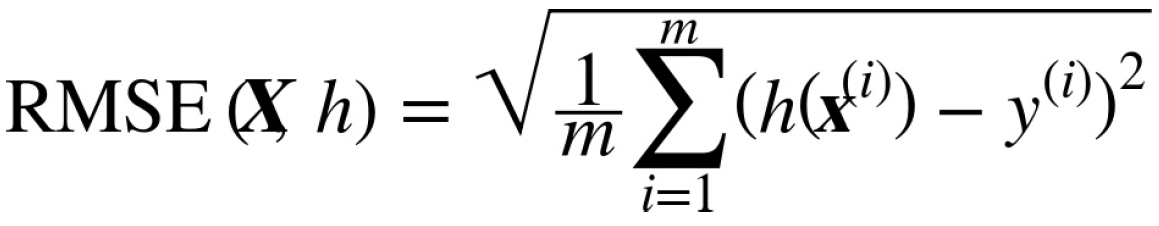



## Get the data

##### Function for retrieving data
The following functions are taken from the machine learning book. 

The function underneath, when called it will create a directory for the data and downloads housing.tgz. After this it extracts the housing.csv to the directory which was made. The dataset consists of 20640 rows and 10 columns. Each row represents a housing district and each column is a property which describes the housing district in some way.  

In [1]:
import os
import tarfile 
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()



The function below is used to create a Pandas DataFrame containing the data.

In [2]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

#### Looking at the data 

For the purpose of inspecting the structure of our data, we can have a peek at the top 10 rows of our data structure. 

In [3]:
housing = load_housing_data()
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


Looking at the data set we can see that each district has 10 different features which are used to describe a district. 

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Table view of the data

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Description of the different rows

Count: Self explanatory, but this is the number of values which are recorded for the given column. 
Mean: The average value. 
std: short for standard deviation. Description of std from wikipedia: "a measure that is used to quantify the amount of variation or dispersion of a set of data values."
min: The recorded minimum value of the given column. 
25%, 50% and 75%: The corresponding percentile. For example: 75% are below 37.71 latitude, 50% are below 34.26 latitude and 25% are belo 33.93 latitude. 
max: The recorded maximum value of the given column. 



### Histogram view of the data

In [6]:
import matplotlib.pyplot as pyplot

housing.hist(bins=50, figsize=(20,15))
pyplot.show()

<Figure size 2000x1500 with 9 Axes>

#### Description of the histograms 

TODO: FILL IN 


### Graphical view

The picture below is taken from the book.

![title](images/CaliforniaHousingFromBook.png)


### Create a Test set
For any ML problem of this nature, it's important to set aside a test set of our data. The test dataset is a dataset used to provide an unbiased evaluation of a final model fit on the training dataset. There are many ways to do this, I will be using a function from sklearn called "train_test_split". Which will split the data set into two parts; 20% of the data set will be set aside as a test set and the remaining 80% will be the training set. The split is done randomly.

In [7]:
from sklearn.model_selection import train_test_split

training_set, test_set = train_test_split(housing, test_size=0.2, random_state = 30)

In [8]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19449,-121.03,37.68,20.0,3204.0,625.0,2016.0,605.0,2.6567,110400.0,INLAND
10452,-117.66,33.46,26.0,2073.0,370.0,952.0,340.0,5.0877,288100.0,<1H OCEAN
18982,-122.01,38.26,12.0,4132.0,710.0,2087.0,633.0,4.5987,139700.0,INLAND
8187,-118.11,33.78,16.0,3985.0,567.0,1327.0,564.0,7.9767,500001.0,<1H OCEAN
15759,-122.44,37.77,52.0,2994.0,736.0,1428.0,700.0,3.0766,438900.0,NEAR BAY


### A closer look at the median income values in our data set

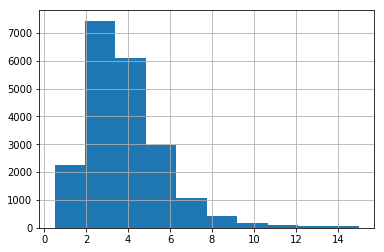

In [9]:
housing["median_income"].hist()

The median income values visualized in the histogram shows us that most of the districts has a median income of somewhere between 20.000 - 50.000 usd. But as you can see there are some median incomes which are much more and also a small part which are below this. 

To prevent biased estimates of the stratum's it's important to not have too many strata and each stratum should be large enough. 
In our case the straum's which are 6 and over are not large enough, merging the stratums greater than 5 together will solve this problem. 

In [10]:
import numpy as np
housing["income_category"] = np.ceil(housing["median_income"] / 1.5)
housing["income_category"].where(housing["income_category"] < 5, 5.0, inplace=True)



Looking at the histogram of the category which we just created, we can see that the issue we had has been solved. 

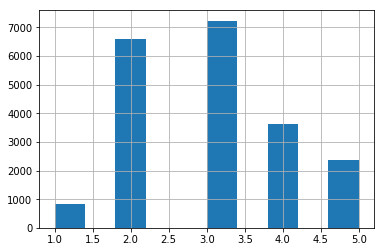

In [11]:
housing["income_category"].hist()

As we now have created categories which we can place all instances in our data set in,
we are ready to do stratified sampling. Stratified sampling is illustrated in the photo below. 

In [12]:
%%html 
<img src="images/Stratified_sampling.png" width= 250 height=250>

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 30)
for training_index, test_index in split.split(housing, housing["income_category"]):
    strat_train_set = housing.loc[training_index]
    strat_test_set = housing.loc[test_index]
    
   

In [14]:
 housing["income_category"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_category, dtype: float64

In order to get the data set back to it's original state,
we use the below code to remove the added "income_category" column. 

In [15]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_category"], axis=1, inplace = True)

 ## Discover and visualize the data to gain insights
 
 ### Put test set aside 
 Earlier I divided the data set into a training set and a test set.
 Now I need to make sure to not touch the test set during training. 

In [16]:
housing = strat_train_set.copy()


### Visualizing geographical data 
The data set cointains some geographical data, latitude and longtitude of the housing districts in California. 
It might be a good idea to plot this to see how the districts are spread out on the map. 



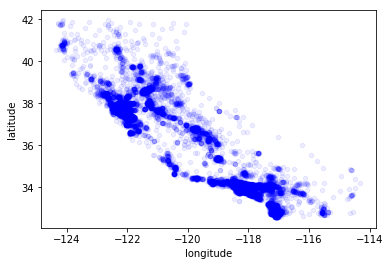

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.07, color = "blue")

If you have some knowledge of California, 
you can easily identify the two major cities of Los Angeles and San Fransisco 
based on the density of the plot. 

If we now look at the housing prices. We can add some parameters to the plot function which will make the plot a lot easier to read. Using the radius of the circle to represent the population and the color to represent the price.

Blue = low price

Red = high price

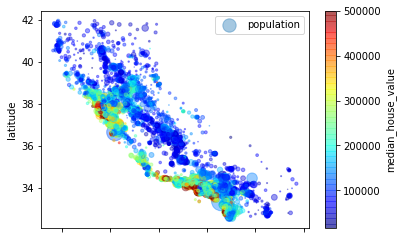

In [18]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.4,
            s = housing["population"]/100, label = "population",
            c = "median_house_value", cmap=pyplot.get_cmap("jet"), colorbar=True)
## cali_image=pyplot.imread("images/california-county-map.gif")
## pyplot.imshow(cali_image, zorder=-1, aspect="auto")
pyplot.show() 

Looking at the image above it seems like housing prices are alot higher near the big cities. You could also argue that ocean approximity plays a large role, but looking at the districts of north california it seems like this does not apply at all times. This is a good example of how not only one feature determines the label, but rather the combination of features. 

### Discovering correlations

#### Correlation matrix

A way of discovering correlations between data is computing the correlation coefficient.

Correlation coefficient formulas are used to find how strong a relationship is between data. The formulas return a value between -1 and 1, where:

1 indicates a strong positive relationship.
-1 indicates a strong negative relationship.
A result of zero indicates no relationship at all.

Luckily python has a method for doing this, called corr(). 


In [19]:
correlation_matrix = housing.corr() ##Creates the correlation matrix 

correlation_matrix["median_house_value"].sort_values(ascending=False) ##Sorts the correlation values related to median housing value descending.





median_house_value    1.000000
median_income         0.690493
total_rooms           0.133722
housing_median_age    0.101441
households            0.063815
total_bedrooms        0.047291
population           -0.022589
longitude            -0.046851
latitude             -0.143953
Name: median_house_value, dtype: float64

Looking at the correlation values there are two features which seems to correlate linearly with the median house value; median income and latitude. The median_income makes sense, when you have a higher income you are more likely to afford a more expensive house, therefore the strong positive correlation value. We also have latitude with the negative correlation, this means that when the latitude value increases, the house value have a tendency to decrease. This also makes sense looking at the scatterplot I created earlier, further north the housing value seemed to go down. 

#### Scatter matrix

Another way of looking for correlations in our dataset is to use Pandas' scatter_matrix function, which plots every numerical attribute against every other numerial attribute. In order to fit all the plots I will focus on the attributes I suspect have a correlation with the median_house_value. 




C:\Users\oyste\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000268B56208D0>,
      dtype=object)

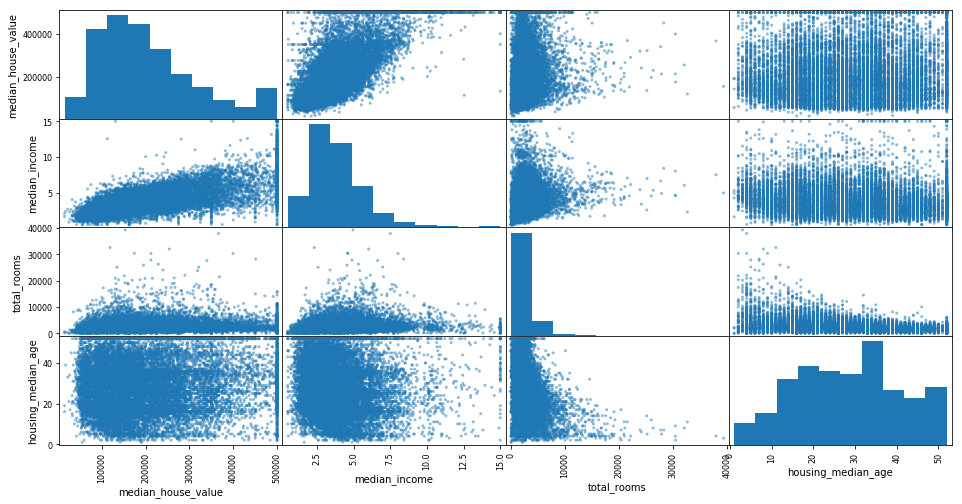

In [20]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(16,8))

Looking at the scatter matrix it's a bit tricky to find correlations. You can see that the rooms of a house correlates to the age of the house. But there is one plot which clearly stands out, which was expected; median income and median house value. Let's have a closer look.

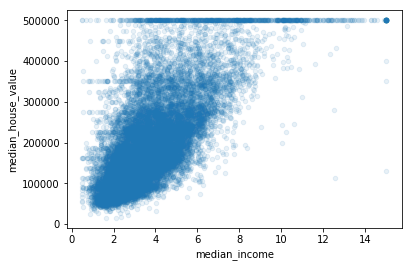

In [21]:
housing.plot(kind="scatter",x = "median_income",y = "median_house_value", alpha = 0.1 )

First of all you can see a clear correlation between median income and median house value. As the median income increases the median house value increases. But there are also a few other interesting things about this plot. First of all you can clearly see that the house value has a cap at 500000, hence the dense blue line at y = 500 000. In addition to this I spot a couple of other blue lines, which I can't explain. These does not seem to follow the same pattern. 

## Prepare the data to better expose the underlying data patterns to machine learning algorithms

### Createing a clean training set


In [22]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()


### Data cleaning

#### Getting rid of lacking feature values

As disovered in the first part when looking at the data, there are some districts which lacks a value for the "total_bedrooms" attribute. As most ML-algorithms does not work with missing features, we have to deal with this in some way. There are multiple ways to do this, one of them is to set some value for the missing attribute. Logically it makes sense to set it to the median value. 


In [23]:
from sklearn.preprocessing import Imputer as imputer

imputer = imputer(strategy = "median") #Imputer is used to take care of missing values

housing_numerical = housing.drop("ocean_proximity", axis = 1) #median can only be used on numerical values. Not boolean.

imputer.fit(housing_numerical) #Fits to training data

imputer.statistics_



array([-118.51  ,   34.26  ,   29.    , 2136.5   ,  436.    , 1170.    ,
        411.    ,    3.5313])

In [24]:
housing_numerical.head() #Just having a look at the data confirming that the median values makes sense. 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20594,-121.57,39.16,21.0,1872.0,302.0,870.0,301.0,3.7250
377,-122.16,37.75,35.0,667.0,140.0,406.0,133.0,3.8047
11228,-117.94,33.81,24.0,4602.0,1131.0,3003.0,1014.0,3.6771
3843,-118.45,34.19,11.0,2479.0,900.0,2466.0,855.0,2.2264
10801,-117.95,33.63,29.0,1496.0,282.0,463.0,215.0,6.0516


In [25]:
training_set_transformed = imputer.transform(housing_numerical) #transforms the training set, adding 

housing_tr = pd.DataFrame(training_set_transformed, columns = housing_numerical.columns)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.57,39.16,21.0,1872.0,302.0,870.0,301.0,3.7250
1,-122.16,37.75,35.0,667.0,140.0,406.0,133.0,3.8047
2,-117.94,33.81,24.0,4602.0,1131.0,3003.0,1014.0,3.6771
3,-118.45,34.19,11.0,2479.0,900.0,2466.0,855.0,2.2264
4,-117.95,33.63,29.0,1496.0,282.0,463.0,215.0,6.0516


### handling text and categorial values 
Earlier I removed the oean_proximity value from our data set in order to compute the median values. In general ML-algorithms prefers numerical values, but we still need to include the ocean_proximity feature in our calculations. Therefore we need to transform the attribute into a numerical value. 

In [26]:
from sklearn.preprocessing import LabelEncoder  #used to convert text labels to numerical values. 

encoder = LabelEncoder() #creates instane of Label Encoder
housing_ocean_prox = housing["ocean_proximity"]
housing_ocean_prox_encoded = encoder.fit_transform(housing_ocean_prox) #fits the encoder to the data set and transforms the categories.

Now we have another issue we need to tackle; the ML algorithms will look at the numeric values (0-4) and think that the actual value will have a meaning. It won't look at the values as categories, and therefore the model won't perform as well as we want. To fix this one possible solution is to add a binary attribute for every category. 



In [27]:
from sklearn.preprocessing import OneHotEncoder #used to convert numerical categorial values into binary attributes. 

encoder = OneHotEncoder() 
housing_categories_1hot = encoder.fit_transform(housing_ocean_prox_encoded.reshape(-1,1))
housing_categories_1hot #stored as a sparse matrix

housing_categories_1hot.toarray() #converts the matrix into a NumPy array

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

#### Custom transformer



In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # Nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [29]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.57,39.16,21,1872,302,870,301,3.725,INLAND,6.21927,2.89037
1,-122.16,37.75,35,667,140,406,133,3.8047,NEAR BAY,5.01504,3.05263
2,-117.94,33.81,24,4602,1131,3003,1014,3.6771,<1H OCEAN,4.53846,2.96154
3,-118.45,34.19,11,2479,900,2466,855,2.2264,<1H OCEAN,2.89942,2.88421
4,-117.95,33.63,29,1496,282,463,215,6.0516,<1H OCEAN,6.95814,2.15349


### Feature scaling and pipelines
ML-algorithms does not perform well when the attributes have very different scales. We can use standardization to fix this.

In [30]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_numerical_transformed = num_pipeline.fit_transform(housing_numerical)

housing_numerical_transformed

array([[-0.99122477,  1.64484742, -0.60165371, ...,  0.34235057,
        -0.02070941, -0.79583882],
       [-1.2853726 ,  0.98512827,  0.50850645, ..., -0.17772759,
         0.00462346, -0.055942  ],
       [ 0.81853224, -0.85834229, -0.36376225, ..., -0.38354914,
        -0.00959793,  0.49044923],
       ...,
       [-0.88652808,  1.41558332, -1.87040817, ..., -0.49029306,
        -0.0992682 ,  0.69178315],
       [ 0.95812782, -0.95191947, -0.60165371, ...,  0.57382536,
        -0.0025016 , -1.15601483],
       [-0.48768356, -0.07697279, -1.31532809, ...,  0.57840709,
        -0.06350252, -0.57717458]])

Scikit-learn provides the Pipeline class which you can use to easily execute a sequence of steps for transforming your data.

In [37]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
from sklearn.preprocessing import LabelBinarizer
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

#Custom transformer used in pipelines for selecting data frames.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, x, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [39]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_numerical)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [40]:
housing_prepared = full_pipeline.fit_transform(housing)

## Explore many different models and short-list the best ones

### Training and evaluating on the training set 

#### Linear regression 

The code underneath trains a Linear Regression model on our prepeared training set. 

In [41]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Testing the model on a part of the training set

In [42]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("The predicted values:\t", lin_reg.predict(some_data_prepared))
print("The actual values:\t\t", list(some_labels))

The predicted values:	 [120063.29439567 225656.49159631 217226.72501769 163518.59022804
 313537.87307922]
The actual values:		 [84700.0, 94300.0, 172200.0, 181300.0, 500001.0]


The model actually works. Not quite well though, looking at the results we see that the model is not
exactly satisfactory. As I started off with saying I will be using Root Mean Squared Error to measure how well 
my model performs. Using Scikit-learn's RMSE function I will now measure the performance of the model on the whole 
training set. 

In [43]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68226.57622849161

A score of 68226 is not exactly what we were looking for, for our project to be successfull we need the model to perform better than the manual workers predictions. An alternative to the linear regression model is the DecisionTreeRegressor. 

#### Decision tree regressor 

In [44]:
from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor() 
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Now as the model is trained we can do as we did with the Linear Regression model and eveluate the model on the training set. 

In [45]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The RMSE returned 0.0, so no error at all. Obviously this can't be a perfect model, what we are seeing here is overfitting. A way to check this is to divide the training set into a training set and a validation set. This is because we are not allowed to touch the test set until we are 100% sure that we are confident in our model. 

#### Cross-validation of our model

For validation of our model we an use Scikit-Learn's cross-validation feature. It randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Deision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds.

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                      scoring = "neg_mean_squared_error", cv=18)
rmse_scores = np.sqrt(-scores)

In [47]:
# Create function which displays scores for us. 

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation:", scores.std())


In [48]:
#Dispaly the scores 

display_scores(rmse_scores)

Scores:  [73333.92137201 63969.62983661 67545.83709417 67694.61958321
 64775.79417282 68437.79605929 72314.82202461 74483.42668721
 71658.20830353 71762.11130552 71456.73912853 70838.28860152
 72482.61472169 68390.83568672 70588.06411168 67095.00427391
 71981.81250695 72179.84403469]
Mean:  70054.96497248173
Standard deviation: 2875.6878121234313


Looking at the results from the cross-validation we now see that
the decision tree is not a perfect model. It actually scores slightly worse than the Linear regression model. 

In [49]:
#Cross validating the linear regression model. 

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring = "neg_mean_squared_error", cv = 18)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [65905.88326684 66534.02181314 66305.9327722  68166.51891691
 67272.96253067 66821.05341654 68587.02800489 71305.99587985
 69234.10510646 74388.77063074 68407.48966801 67689.8113636
 75331.66106688 65129.21924684 66464.73410458 67886.87224875
 70148.06484295 67935.10307884]
Mean:  68528.62377548228
Standard deviation: 2678.922696725489


#### Random Forests model 

One last model I will try is the RandomForestRegressor. 

In [50]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring = "neg_mean_squared_error", cv = 18)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [49749.33139478 49551.3890519  46517.69337294 50830.13991555
 50335.03850225 50412.07223097 52638.94024127 57247.21375733
 53593.96166466 55133.52284015 53263.05633715 54254.90606717
 52664.75975688 50464.75016323 50748.23203108 52373.47140399
 53844.61039005 52836.06571382]
Mean:  52025.50860195408
Standard deviation: 2396.2394834484467


The cross validation of our Random Forests model looks alot better than our previous two models. The model is still overfitting the training set, there are solutions to this, but I won't go into it here. 

## Fine-tune your models and combine them into a great solution

### Grid Search 

Using GridSearchCV I can evaluate all the possible combinations of hyperparameter values, in order to create the best possible model I can. 

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 40], 'max_features' : [2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 40], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

The training is now done, and we an look at the best combination of params whih the GridSearch function generated for us. 

In [52]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 40}

In [53]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)



63698.77944519038 {'max_features': 2, 'n_estimators': 3}
55080.835049812275 {'max_features': 2, 'n_estimators': 10}
52011.239965979425 {'max_features': 2, 'n_estimators': 40}
60292.01425631393 {'max_features': 4, 'n_estimators': 3}
51852.8510646393 {'max_features': 4, 'n_estimators': 10}
49716.958186770724 {'max_features': 4, 'n_estimators': 40}
58142.33741952539 {'max_features': 6, 'n_estimators': 3}
52359.14223039453 {'max_features': 6, 'n_estimators': 10}
49702.69448495412 {'max_features': 6, 'n_estimators': 40}
57909.244122215205 {'max_features': 8, 'n_estimators': 3}
51906.781142826665 {'max_features': 8, 'n_estimators': 10}
49369.9147734393 {'max_features': 8, 'n_estimators': 40}
61937.72626179588 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53757.726485055064 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59853.745095943734 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52179.04420229502 {'bootstrap': False, 'max_features': 3, 'n_estimators

Looking at all the results, and the best one with parameters 6, 40. We see an improvement in our model, more precicely an improvement of 2 414 usd! 

#### Analyzing the model


In [54]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances # Array showing the importance value for each feature.

array([6.41638850e-02, 6.19874334e-02, 4.52887043e-02, 1.58478332e-02,
       1.55460524e-02, 1.49960693e-02, 1.39320719e-02, 3.76229019e-01,
       5.53512988e-02, 1.06040713e-01, 5.65941953e-02, 5.20470968e-03,
       1.62462130e-01, 9.90086592e-05, 2.19918795e-03, 4.05768938e-03])

In [55]:
#With corresponding feature names. 

attributes = num_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.37622901874878734, 'median_income'),
 (0.06416388498493039, 'longitude'),
 (0.06198743337215821, 'latitude'),
 (0.04528870434158575, 'housing_median_age'),
 (0.015847833197291657, 'total_rooms'),
 (0.01554605237740209, 'total_bedrooms'),
 (0.014996069256440037, 'population'),
 (0.013932071858152647, 'households')]

#### Evaluating the model on the test set



In [56]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
Y_test = strat_test_set["median_house_value"]

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)

final_rmse = np.sqrt(final_mse)

In [57]:
final_rmse

48939.63878449462

#### Computing the 95% Confidence interval 

In [58]:
from scipy import stats

confidence  = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

NameError: name 'y_test' is not defined

## Present your solution

### Evaluation of the project 

In this project we have started with a data-set containing information of housing districts in California. 

From this we have gone through the steps of exploring the data, transforming it to better fit into the ML-algorithms, picking out a model and fine tuning it. Through a relatively small amount of LOC (but some powerful tools) I have been able to create a functional system for predicting district housing prices, which is better than doing it manually. The accuracy of the model is pretty good, but still not better than the manual labor. Manual error rate = 15 %. But the time consumed of doing the predictions is way less. 

## Launch, monitor and maintain your system

The job is not done yet. After creating such a system there are a couple of points you need to do.

* Write monitoring code for checking performance. 
* Human evaluation. 
* Evaluate the input data quality. 
* 